# 1次元の混合正規分布に対してのEMアルゴリズムを実装・描画
- https://cartman0.hatenablog.com/entry/2019/07/01/EM%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E3%81%A7%E6%B7%B7%E5%90%88%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83%28MoG%29%E3%81%AE%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%82%92%E5%B0%8E
-  https://qiita.com/ta-ka/items/3e8b127620ac92a32864

In [1]:
import warnings

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from scipy import stats

%matplotlib inline
warnings.simplefilter('ignore')

matplotlib.colors.cnames


sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

In [3]:
# E-step
def EStep(k_size, data_x, lambda_vec, mu_vec, sigma2_vec):
    '''
    data_x[i]
    lambda[k]
    mu[k]
    sigma[k]
    '''
    I = len(data_x)
    # 中身を初期化せずに配列を作成する関数である。
    # 2行, 1000列の配列を生成
    responsibility = sp.empty((k_size, I))
    
    for k in sp.arange(k_size):
        norm = stats.norm(loc=mu_vec[k], scale=sp.sqrt(sigma2_vec[k]))
        responsibility[k] = lambda_vec[k] * norm.pdf(data_x)

    responsibility = responsibility / sp.sum(responsibility, axis=0)
    return responsibility

def MStep(k_size, responsibility, data_x):

    lambda_vec = sp.empty(k_size)
    mu_vec = sp.empty(k_size)
    sigma2_vec = sp.empty(k_size)

    for k in sp.arange(k_size):
        r_k = responsibility[k]
        lambda_vec[k] = sp.sum(r_k) / responsibility.shape[1]
        mu_vec[k] = sp.sum(r_k * data_x) / sp.sum(r_k)
        sigma2_vec[k] = sp.sum(r_k * (data_x - mu_vec[k])**2) / sp.sum(r_k)

    return lambda_vec, mu_vec, sigma2_vec

In [4]:
def calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec):
    pdf = sp.zeros_like(x)

    for k in sp.arange(k_size):
        norm_k = stats.norm(loc=mu_vec[k], scale=sp.sqrt(sigma2_vec[k]))
        pdf += lambda_vec[k] * norm_k.pdf(x)
    return pdf

# データの生成  
- f1：平均40, 分散100, データ数6000   
- f2：平均70, 分散25, データ数4000  
- f1とf2の割合は6:4

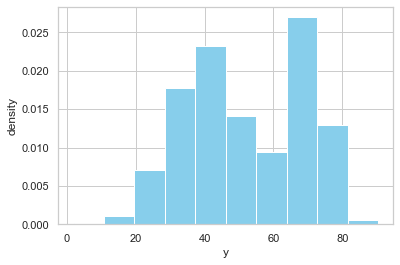

In [27]:
# 乱数seedの固定
np.random.seed(seed=123)

# 平均40, 分散100
N1 = stats.norm(loc=40, scale=sp.sqrt(10*10))
# 平均70, 分散25
N2 = stats.norm(loc=70, scale=sp.sqrt(5*5))

# rvs (Random variates) 確率変数
s1 = N1.rvs(size=6000)
s2 = N2.rvs(size=4000)

# データの連結
data_x = sp.hstack((s1, s2))

plt.hist(data_x,  density=True, color="skyblue")
plt.xlabel('y')
plt.ylabel('density')

plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/simulation1_hist.eps")

## 初期値の設定  
- データをランダムに2分割  
- それぞれの平均値を初期値に用いる
- 分散は全体の標本分散を用いる  
  
## 参考
- 入門　パターン認識と機械学習(https://www.coronasha.co.jp/np/isbn/9784339024791/)


mu1の初期値 40.21082886827433
sigma1の初期値 238.7315098916443
mu2の初期値 63.97324033898476
sigma2の初期値 326.7968568251647


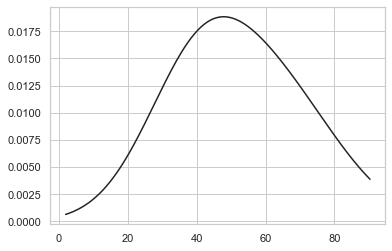

In [28]:
# データをランダムに2分割
random_x = np.split(data_x, 2)
random_x1 = random_x[0]
random_x2 = random_x[1]

mu1_first = np.mean(random_x1)
sigma1_first = np.sum((random_x1 - np.mean(data_x))**2)/random_x1.shape[0]
#sigma1_first = np.var(random_x1)
print("mu1の初期値", mu1_first)
print("sigma1の初期値", sigma1_first)

mu2_first = np.mean(random_x2)
sigma2_first = np.sum((random_x2 - np.mean(data_x))**2)/random_x2.shape[0]
#sigma2_first = np.var(random_x2)
print("mu2の初期値", mu2_first)
print("sigma2の初期値", sigma2_first)

# 混合正規分布の数
k_size = 2

# 正規分布の割合
lambda_vec=[0.5, 0.5]

# 平均(mu)の初期値
mu_vec=[mu1_first, mu2_first]
# 分散(sigma)の初期値
sigma2_vec=[sigma1_first, sigma2_first]

# データ(-6から6までを200こ)
x = sp.linspace(np.min(random_x), np.max(random_x), 10000)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label="ini")

i: 0 lambda [0.4928 0.5072] mu [42.361  61.5474] sigma2 [184.3098 197.0146]
i: 50 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 100 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 150 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 200 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 250 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 300 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 350 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 400 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 450 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]
i: 500 lambda [0.5985 0.4015] mu [40.1147 69.9472] sigma2 [97.4226 26.3969]


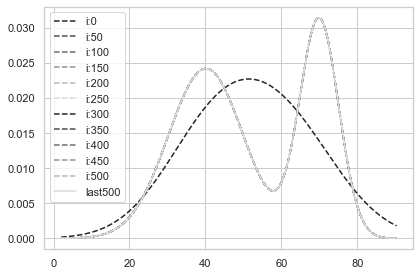

In [29]:
# 80回繰り返す
for i in sp.arange(500+1):
    # Estep
    # responsibilityの更新 
    responsibility = EStep(k_size, data_x, lambda_vec, mu_vec, sigma2_vec)
    
    # Mstep
    # 混合割合, 平均, 分散の更新
    lambda_vec, mu_vec, sigma2_vec = MStep(k_size, responsibility, data_x)
    
    if i % 50 == 0:
        print("i:", i, "lambda", lambda_vec.round(4), "mu", mu_vec.round(4), "sigma2", sigma2_vec.round(4))
        plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"i:{i}", linestyle="--")
        
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-")

plt.legend()
plt.tight_layout()
plt.show()

In [30]:
k_size

2

In [31]:
print("f1の混合比率", lambda_vec[0])
print("mu1", mu_vec[0])
print("sigma1", np.sqrt(sigma2_vec[0]))
print(" ")
print("f2の混合比率", lambda_vec[1])
print("mu2", mu_vec[1])
print("sigma2", np.sqrt(sigma2_vec[1]))

f1の混合比率 0.5985150068037337
mu1 40.1147261293302
sigma1 9.870287876998209
 
f2の混合比率 0.40148499319626624
mu2 69.94724459769601
sigma2 5.137788536875377


# 真の値
- 平均40, 分散100  
N1 = stats.norm(loc=40, scale=sp.sqrt(10*10))  
- 平均70, 分散25  
N2 = stats.norm(loc=70, scale=sp.sqrt(5*5))  

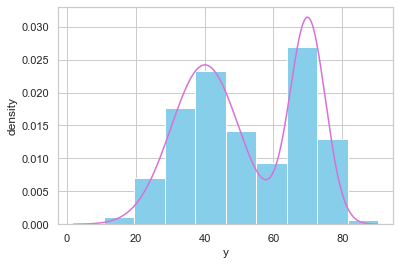

In [32]:
# 推定された分布の可視化

plt.hist(data_x,  density=True, color="skyblue")
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-",color="orchid")
plt.xlabel('y')
plt.ylabel('density')
plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/simulation1_result.eps")

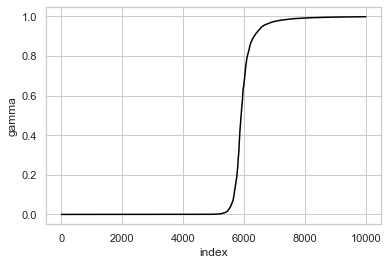

In [33]:
plt.plot(sorted(responsibility[1]), color="black")
plt.xlabel('index')
plt.ylabel('gamma')
plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/simulation1_responsibility.eps")

# データが少ない場合  

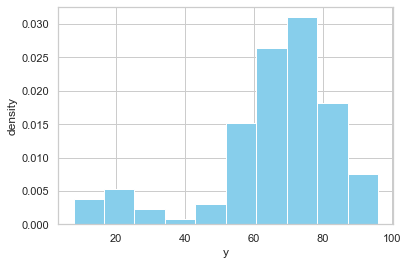

In [13]:
# 乱数seedの固定
np.random.seed(seed=123)


# データ数
N=150
# 混合比
p=0.1
# 混合正規分布の数
k_size = 2

N1 = stats.norm(loc=20, scale=sp.sqrt(25))
N2 = stats.norm(loc=70, scale=sp.sqrt(100))

# rvs (Random variates) 確率変数
s1 = N1.rvs(size=int(N*p))
s2 = N2.rvs(size=int(N*(1-p)))
# データの連結
data_x = sp.hstack((s1, s2))

plt.hist(data_x,  density=True, color="skyblue")
plt.xlabel('y')
plt.ylabel('density')
plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/simulation2_hist.eps")

mu1の初期値 60.632480489721225
sigma1の初期値 573.2838454678703
mu2の初期値 70.7274160977579
sigma2の初期値 128.91932372580672


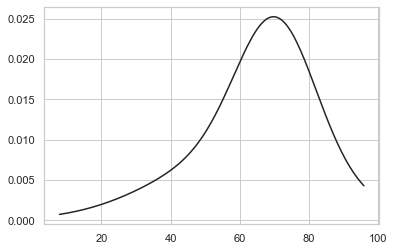

In [14]:
# データをランダムに2分割
random_x = np.split(data_x, 2)
random_x1 = random_x[0]
random_x2 = random_x[1]

mu1_first = np.mean(random_x1)
sigma1_first = np.sum((random_x1 - np.mean(data_x))**2)/random_x1.shape[0]
#sigma1_first = np.var(random_x1)
print("mu1の初期値", mu1_first)
print("sigma1の初期値", sigma1_first)

mu2_first = np.mean(random_x2)
sigma2_first = np.sum((random_x2 - np.mean(data_x))**2)/random_x2.shape[0]
#sigma2_first = np.var(random_x2)
print("mu2の初期値", mu2_first)
print("sigma2の初期値", sigma2_first)

# 混合正規分布の数
k_size = 2

# 正規分布の割合
lambda_vec=[0.5, 0.5]

# 平均(mu)の初期値
mu_vec=[mu1_first, mu2_first]
# 分散(sigma)の初期値
sigma2_vec=[sigma1_first, sigma2_first]

# データ(-6から6までを200こ)
x = sp.linspace(np.min(random_x), np.max(random_x), N)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label="ini")

i: 0 lambda [0.4448 0.5552] mu [58.3214 71.5763] sigma2 [574.861   93.6492]
i: 50 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 100 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 150 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 200 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 250 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 300 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 350 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 400 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 450 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]
i: 500 lambda [0.0999 0.9001] mu [18.9728 70.8637] sigma2 [ 31.1458 117.6212]


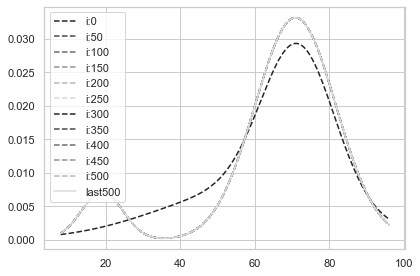

In [15]:
# 80回繰り返す
for i in sp.arange(500+1):
    # Estep
    # responsibilityの更新 
    responsibility = EStep(k_size, data_x, lambda_vec, mu_vec, sigma2_vec)
    
    # Mstep
    # 混合割合, 平均, 分散の更新
    lambda_vec, mu_vec, sigma2_vec = MStep(k_size, responsibility, data_x)
    
    if i % 50 == 0:
        print("i:", i, "lambda", lambda_vec.round(4), "mu", mu_vec.round(4), "sigma2", sigma2_vec.round(4))
        plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"i:{i}", linestyle="--")
        
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-")

plt.legend()
plt.tight_layout()
plt.show()

In [16]:
print("f1の混合比率", lambda_vec[0])
print("mu1", mu_vec[0])
print("sigma1", np.sqrt(sigma2_vec[0]))
print(" ")
print("f2の混合比率", lambda_vec[1])
print("mu2", mu_vec[1])
print("sigma2", np.sqrt(sigma2_vec[1]))

f1の混合比率 0.0998972197788786
mu1 18.972754381346437
sigma1 5.580846384345823
 
f2の混合比率 0.9001027802211213
mu2 70.86371054628454
sigma2 10.845333009282019


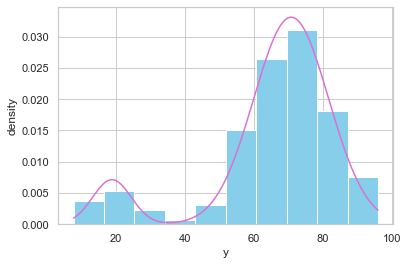

In [18]:
# 推定された分布の可視化

plt.hist(data_x,  density=True, color="skyblue")
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-",color="orchid")
plt.xlabel('y')
plt.ylabel('density')
plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/simulation2_result.eps")

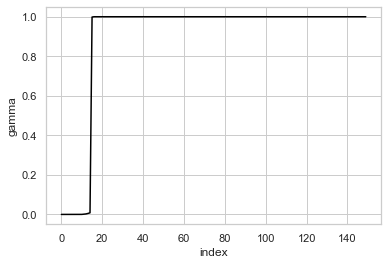

In [25]:
plt.plot(sorted(responsibility[1], reverse=False), color="black")
plt.xlabel('index')
plt.ylabel('gamma')
plt.savefig("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/simulation2_responsibility.eps")